In [1]:
import re
import neattext as nt
import nltk
import string
from nltk.corpus import stopwords
import pandas as pd     
import seaborn as sns  
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib
import matplotlib.pyplot as plt

In [2]:
df_traindata = pd.read_csv('C:/Masters/CS579/Project 2/files/train.csv')
df_testdata = pd.read_csv('C:/Masters/CS579/Project 2/files/test.csv')

Histogram of Label in Training Data


<AxesSubplot:>

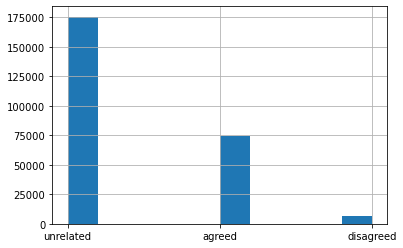

In [3]:
print("Histogram of Label in Training Data")
df_traindata['label'].hist()

In [4]:
print("Value counts of labels in Training Data")
df_traindata['label'].value_counts()

Value counts of labels in Training Data


unrelated    175598
agreed        74238
disagreed      6606
Name: label, dtype: int64

Data Pre-Processing

In [5]:
df_traindata['NEWS']=df_traindata.title1_en+' '+df_traindata.title2_en
df_testdata['NEWS']=df_testdata.title1_en+' '+df_testdata.title2_en

In [6]:
stop_words = stopwords.words("english")
df_traindata['NEWS'] = df_traindata['NEWS'].str.lower()
print('After converting to lower case \n',df_traindata['NEWS'].head())
df_testdata['NEWS'] = df_testdata['NEWS'].str.lower()
print('After converting to lower case \n',df_testdata['NEWS'].head())
df_traindata['NEWS'] = df_traindata['NEWS'].apply(lambda x:nt.remove_stopwords(x))
print('After converting with stop words case \n',df_traindata['NEWS'].head())
df_testdata['NEWS'] = df_testdata['NEWS'].apply(lambda x:nt.remove_stopwords(x))
print('After converting with stop words case \n',df_testdata['NEWS'].head())
asci_dec=lambda x: x.encode('ascii', 'ignore').decode()
df_traindata['NEWS']=df_traindata['NEWS'].apply(asci_dec)
df_testdata['NEWS']=df_testdata['NEWS'].apply(asci_dec)
df_traindata['NEWS'] = df_traindata['NEWS'].str.replace(re.compile('[!@#$%^&*()_+{}:"<>?,./]'), '')
print('After removing punctations and symbols \n',df_traindata['NEWS'].head())
df_testdata['NEWS'] = df_testdata['NEWS'].str.replace(re.compile('[!@#$%^&*()_+{}:"<>?,./]'), '')
print('After removing punctations and symbols \n',df_testdata['NEWS'].head())


After converting to lower case 
 0    there are two new old-age insurance benefits f...
1    "if you do not come to shenzhen, sooner or lat...
2    "if you do not come to shenzhen, sooner or lat...
3    "if you do not come to shenzhen, sooner or lat...
4    "if you do not come to shenzhen, sooner or lat...
Name: NEWS, dtype: object
After converting to lower case 
 0    the great coat brother zhu zhu wen, in the man...
1    nasa reveals facts about ufo wreckage found on...
2    the hollow tomatoes are loaded with hormones. ...
3    ange pavilion geoshui: how accurate is matrimo...
4    a 50-year-old bus-bus blows up an 8-year-old c...
Name: NEWS, dtype: object
After converting with stop words case 
 0    new old-age insurance benefits old people rura...
1    "if come shenzhen, sooner later son come." 10 ...
2    "if come shenzhen, sooner later son come." 10 ...
3    "if come shenzhen, sooner later son come." 10 ...
4    "if come shenzhen, sooner later son come." 10 ...
Name: NEWS, dtype

In [7]:
X=df_traindata.NEWS
y=df_traindata.label

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Length of Training NEWS Data: ",len(X_train))
print("Length of Testing NEWS Data: ",len(X_test))
print("Length of Training LABEL Data: ",len(y_train))
print("Length of Testing LABEL Data: ",len(y_test))

Length of Training NEWS Data:  205153
Length of Testing NEWS Data:  51289
Length of Training LABEL Data:  205153
Length of Testing LABEL Data:  51289


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)


In [12]:
model= RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [65]:
from sklearn import metrics
print("Validations for Random Forest Classifier:\n")
print('Length of predicated values')
y_pred=model.predict(X_test)
print(len(y_pred))
print("The accuracy of Random Forest Model")
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classificaiton Reports: \n",metrics.classification_report(y_test,y_pred))

Validations for Random Forest Classifier:

Length of predicated values
51289
The accuracy of Random Forest Model
Accuracy: 0.8483105539199438
Classificaiton Reports: 
               precision    recall  f1-score   support

      agreed       0.82      0.69      0.75     14813
   disagreed       0.78      0.27      0.40      1321
   unrelated       0.86      0.93      0.89     35155

    accuracy                           0.85     51289
   macro avg       0.82      0.63      0.68     51289
weighted avg       0.85      0.85      0.84     51289



In [14]:
print("Predicting the values of label for Test Data")
A=df_testdata.NEWS
test_x= vectorizer.transform(A)
y_predict=model.predict(test_x)
df_1=pd.DataFrame(y_predict)

Predicting the values of label for Test Data


Histogram of Label values in Testing Data predicted by Random Forest Model 

  Count of Each Labels 



unrelated    47612
agreed       15961
disagreed      537
Name: 0, dtype: int64

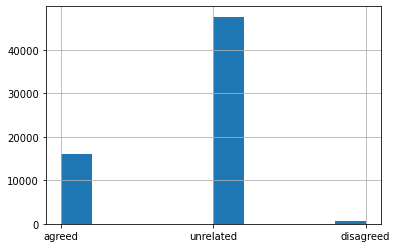

In [19]:
print("Histogram of Label values in Testing Data predicted by Random Forest Model ")
df_1[0].hist()
print("\n  Count of Each Labels \n")
df_1[0].value_counts()

In [30]:
test_res=pd.DataFrame({"id": df_testdata.id, "label": y_predict},)
test_res.to_csv('submission.csv',index=False)
print("Sample of submission.csv file")
test_res

Sample of submission.csv file


,id,label
0,256442,agreed
1,256443,unrelated
2,256444,unrelated
3,256445,unrelated
4,256446,unrelated
...,...,...
64105,320547,unrelated
64106,320548,unrelated
64107,320549,agreed
64108,320550,unrelated


In [31]:
print("Training the Data for Multinominal Distribution")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Training the Data for Multinominal Distribution


In [32]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [63]:
from sklearn.naive_bayes import MultinomialNB
model1=MultinomialNB()
model1.fit(X_train,y_train)
y_pred = model1.predict(X_test)

In [64]:
from sklearn import metrics
print("Validations for Naïve Bayes Model:\n")
print("The accuracy of Naïve Bayes Model ")
acc = accuracy_score(y_test, y_pred)
print(acc)
print("Classificaiton Reports: \n",metrics.classification_report(y_test,y_pred))

Validations for Naïve Bayes Model:

The accuracy of Naïve Bayes Model 
0.7300395796369592
Classificaiton Reports: 
               precision    recall  f1-score   support

      agreed       0.63      0.35      0.45     14813
   disagreed       0.65      0.12      0.21      1321
   unrelated       0.75      0.91      0.82     35155

    accuracy                           0.73     51289
   macro avg       0.68      0.46      0.49     51289
weighted avg       0.71      0.73      0.70     51289



Predicting the values of label for Test Data

  Count of Each Labels 



unrelated    53306
agreed       10453
disagreed      351
Name: 0, dtype: int64

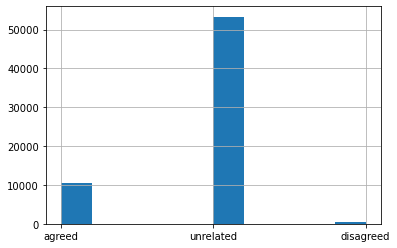

In [40]:
print("Predicting the values of label for Test Data")
B=df_testdata.NEWS
test_x= vectorizer.transform(B)
y_predict=model1.predict(test_x)
df_2=pd.DataFrame(y_predict)
df_2[0].hist()
print("\n  Count of Each Labels \n")
df_2[0].value_counts()

In [46]:
print('Training the Data for Decision Tree Classifier Model')
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Training the Data for Decision Tree Classifier Model


In [47]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [49]:
model2= DecisionTreeClassifier(random_state=42)
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)


The accuracy of Desicion Tree Classifier Model 
0.7785880013258204


In [61]:
from sklearn import metrics
print("Validations for Desicion Tree Classifier:\n")
print("The accuracy of Desicion Tree Classifier Model ")
acc2 = accuracy_score(y_test, y_pred)
print(acc2)
print("Classificaiton Reports: \n",metrics.classification_report(y_test,y_pred))

Validations for Desicion Tree Classifier:

The accuracy of Desicion Tree Classifier Model 
0.7785880013258204
Classificaiton Reports: 
               precision    recall  f1-score   support

      agreed       0.66      0.67      0.67     14813
   disagreed       0.40      0.38      0.39      1321
   unrelated       0.84      0.84      0.84     35155

    accuracy                           0.78     51289
   macro avg       0.64      0.63      0.63     51289
weighted avg       0.78      0.78      0.78     51289



Predicting the values of label for Test Data

  Count of Each Labels 



unrelated    43705
agreed       18891
disagreed     1514
Name: 0, dtype: int64

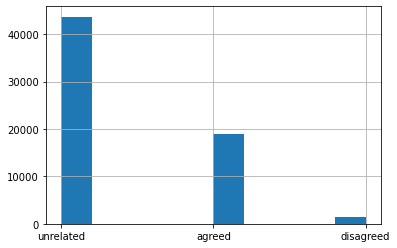

In [50]:
print("Predicting the values of label for Test Data")
C=df_testdata.NEWS
test_x= vectorizer.transform(C)
y_predict=model2.predict(test_x)
df_3=pd.DataFrame(y_predict)
df_3[0].hist()
print("\n  Count of Each Labels \n")
df_3[0].value_counts()

In [51]:
print("We have calculated accuracy of three models")
print("1.Accuracy of Random Forest Classifier :",accuracy)
print("2.Accuracy of Multinominal Distribution :",acc)
print("3.Accuracy of Desicion Tree Classifier :",acc2)

We have calculated accuracy of three models
1.Accuracy of Random Forest Classifier : 0.8483105539199438
2.Accuracy of Multinominal Distribution : 0.7300395796369592
3.Accuracy of Desicion Tree Classifier : 0.7785880013258204


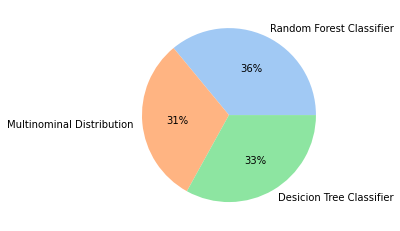

In [52]:
data = [accuracy, acc, acc2]
labels = ['Random Forest Classifier', 'Multinominal Distribution', 'Desicion Tree Classifier']
colors = sns.color_palette('pastel')[0:5]
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

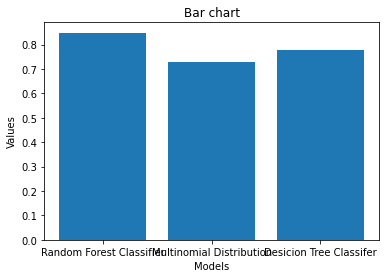

In [53]:
plt.bar(['Random Forest Classifier', 'Multinomial Distribution', 'Desicion Tree Classifer'], [accuracy,acc,acc2])
plt.xlabel('Models')
plt.ylabel('Values')
plt.title('Bar chart')
plt.show()